In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import stdev
import json

In [2]:
df = pd.read_csv('housedata.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df = df.replace(to_replace=["yes","no","furnished","semi-furnished","unfurnished"],value=[1,0,1,0,0])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [6]:
result = df.select_dtypes(include='number')
print(result)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [7]:
result = result.round()
result = result.astype('int')
print(result)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

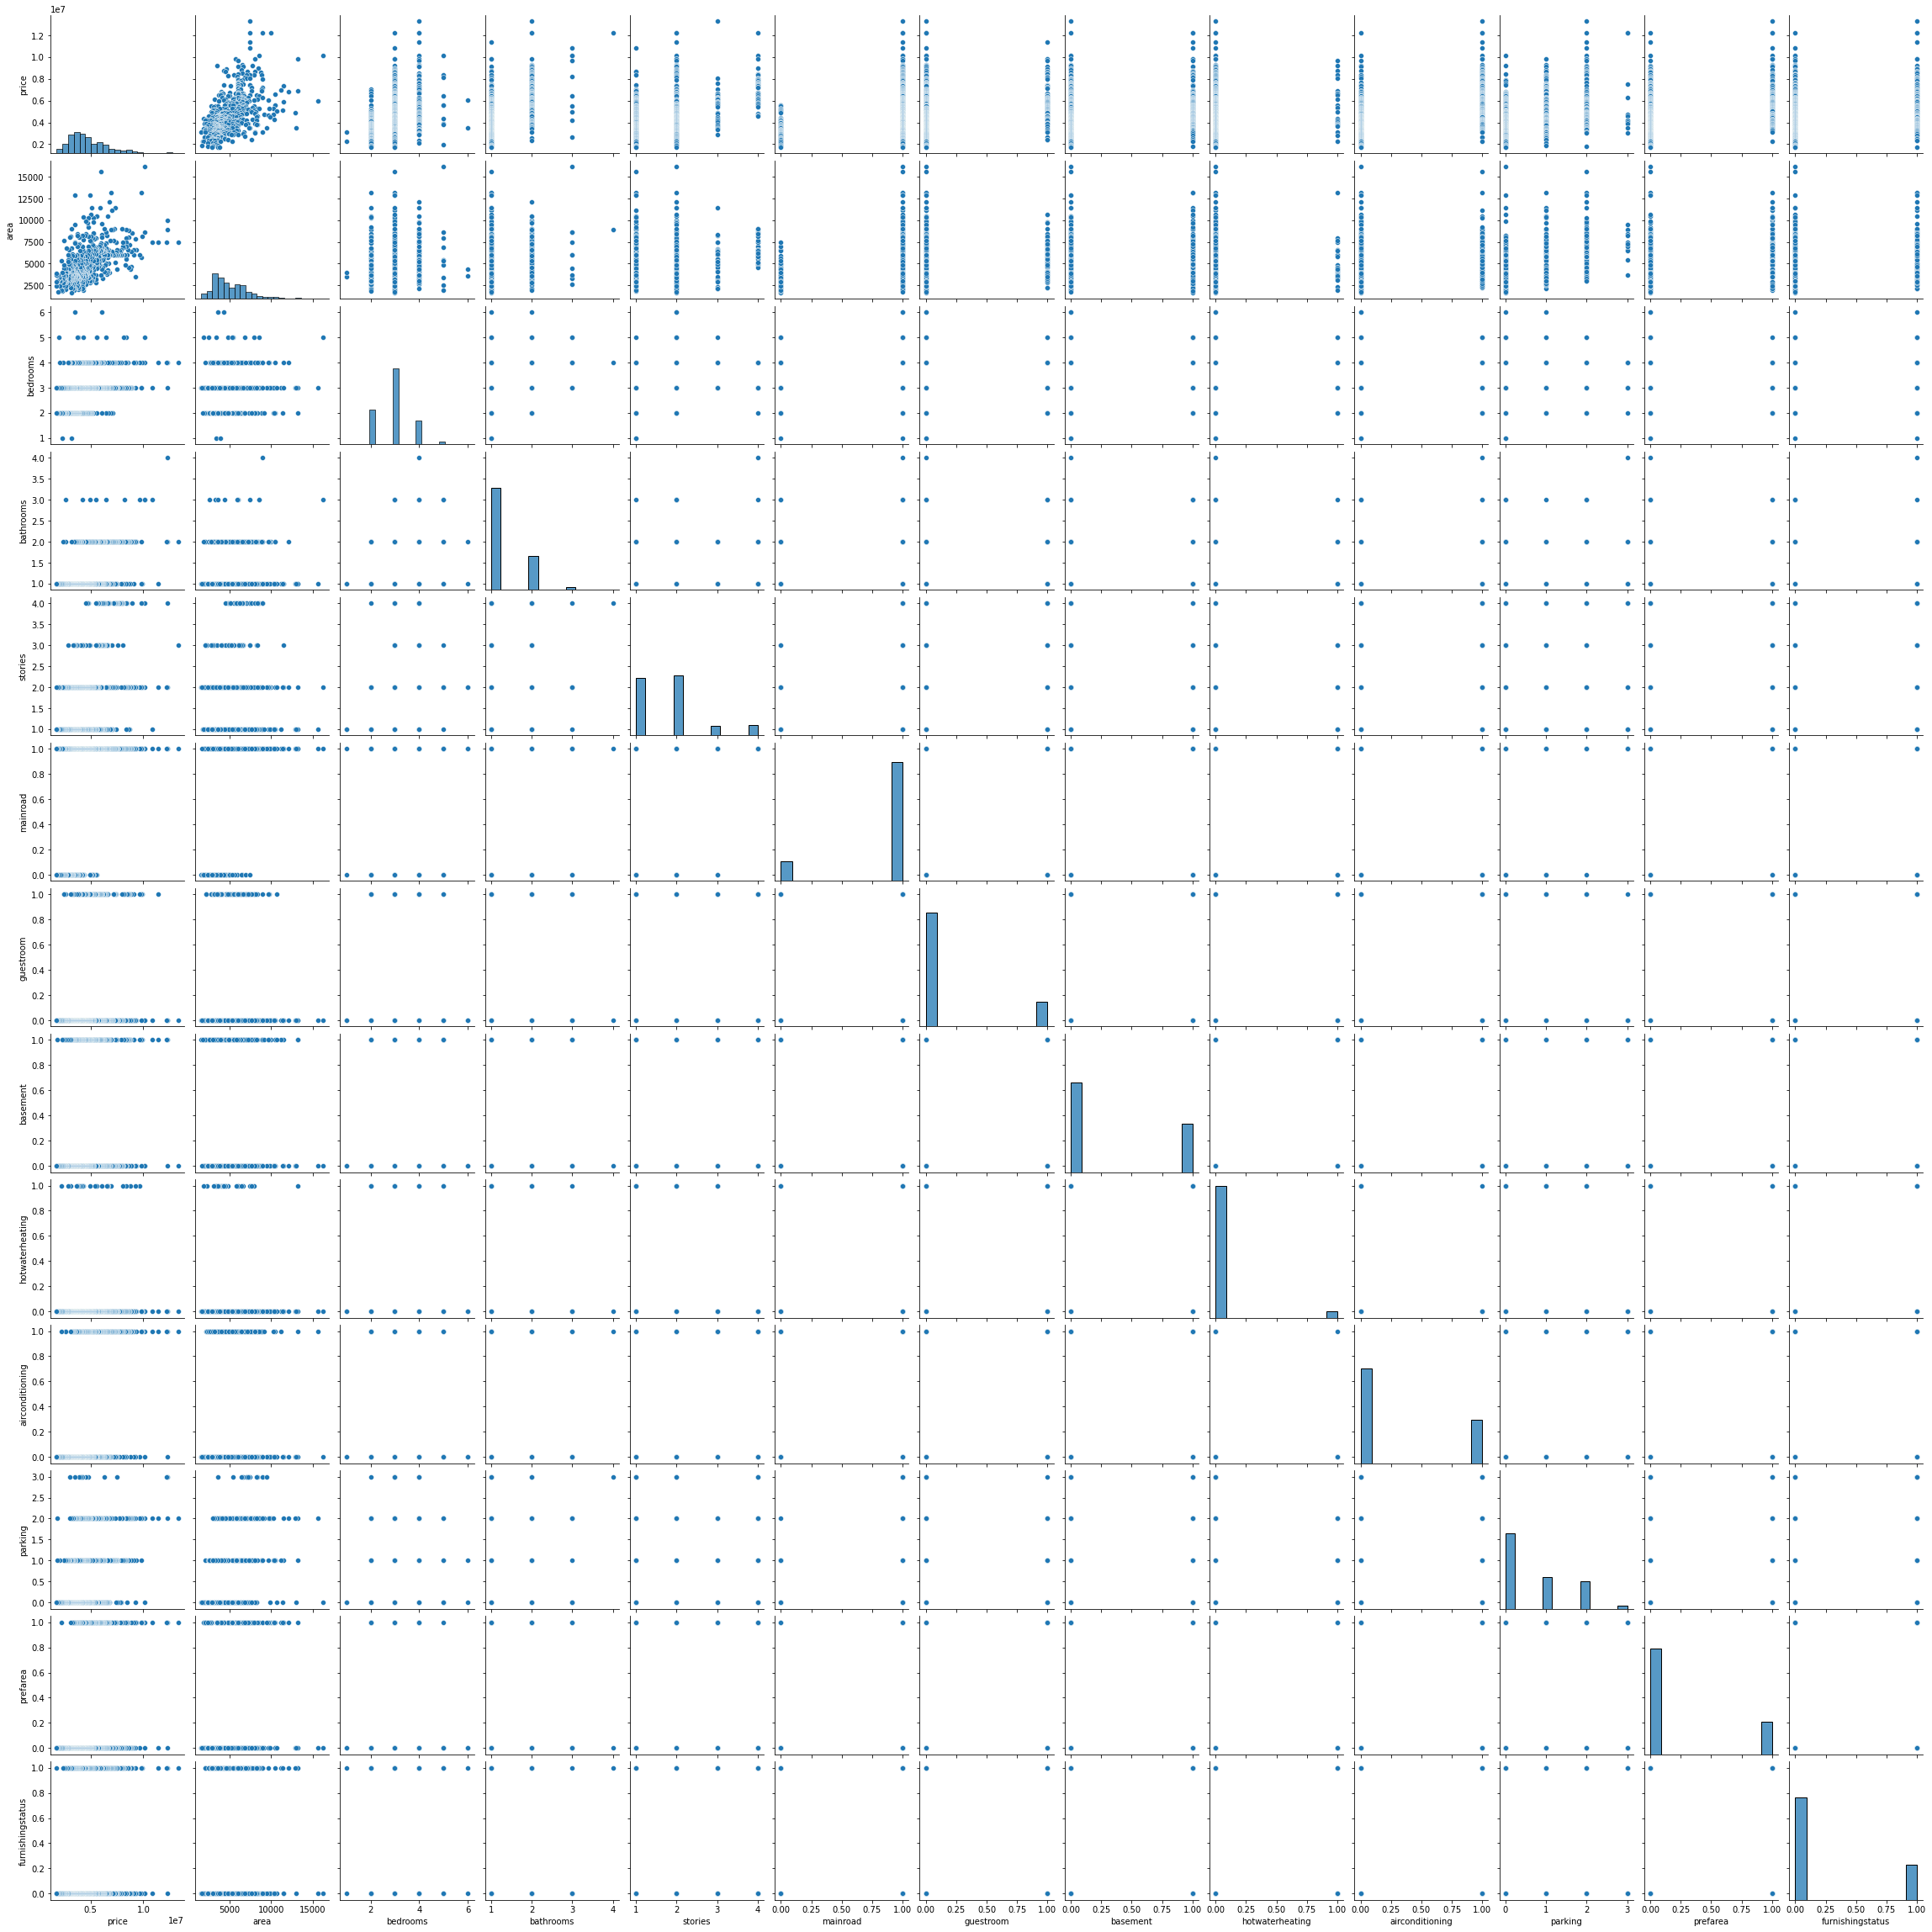

In [8]:
sns.pairplot(result)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
train = result.drop(['price'] , axis=1)
test = df['price']

In [12]:
x_train , x_test , y_train , y_test = train_test_split(train , test ,train_size=0.7, test_size=0.2 , random_state = 2)

In [13]:
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [14]:
y_test

333    3920000
84     6510000
439    3255000
396    3500000
161    5460000
        ...   
100    6230000
344    3850000
176    5250000
244    4550000
15     9100000
Name: price, Length: 109, dtype: int64

In [15]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
333,3000,3,1,2,1,0,0,0,0,0,0,0
84,3760,3,1,2,1,0,0,1,0,2,0,0
439,3930,2,1,1,0,0,0,0,0,0,0,0
396,3640,2,1,1,1,0,0,0,0,1,0,0
161,6100,3,1,3,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,6600,3,2,1,1,0,1,0,1,0,1,0
344,3850,2,1,1,1,0,0,0,0,0,0,0
176,8520,3,1,1,1,0,0,0,1,2,0,1
244,5320,3,1,2,1,1,1,0,0,0,1,0


In [23]:
predicted_data = reg.predict(x_test)
predicted_data

array([ 3096232.70537031,  4727694.11505516,  2338909.38230116,
        3087099.39293142,  6260240.04082537,  4054299.62463333,
        3871388.01009844,  3187478.01024785,  3967436.74642947,
        3321708.3950482 ,  3900277.46299656,  3113425.96255403,
        4008904.44702608,  5272065.52235462,  5049127.26807886,
        6946119.52071036,  7245161.82251674,  4497832.44402291,
        3061987.29564731,  4384806.39731702,  5501555.09244282,
        4933181.93120004,  4838290.06883253,  6511395.68243358,
        2072994.49380091,  2394411.35355482,  2840509.59493054,
        4308180.55986948,  5233700.32021325,  3208871.43860979,
        4951860.79912027,  3952562.48988184,  3783663.41464913,
        4875507.36853118,  4036523.07722315,  7441422.79399533,
        2589150.6839911 ,  5561716.1589447 ,  5009166.15641928,
        2709582.74975546,  7177159.0285324 ,  3461213.92488047,
        3413231.92093474,  3949311.54263976,  3130600.25763915,
        3643411.61473588,  3319350.64302

In [17]:
print(x_test.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


In [18]:
predicted_data

array([ 3096232.70537031,  4727694.11505516,  2338909.38230116,
        3087099.39293142,  6260240.04082537,  4054299.62463333,
        3871388.01009844,  3187478.01024785,  3967436.74642947,
        3321708.3950482 ,  3900277.46299656,  3113425.96255403,
        4008904.44702608,  5272065.52235462,  5049127.26807886,
        6946119.52071036,  7245161.82251674,  4497832.44402291,
        3061987.29564731,  4384806.39731702,  5501555.09244282,
        4933181.93120004,  4838290.06883253,  6511395.68243358,
        2072994.49380091,  2394411.35355482,  2840509.59493054,
        4308180.55986948,  5233700.32021325,  3208871.43860979,
        4951860.79912027,  3952562.48988184,  3783663.41464913,
        4875507.36853118,  4036523.07722315,  7441422.79399533,
        2589150.6839911 ,  5561716.1589447 ,  5009166.15641928,
        2709582.74975546,  7177159.0285324 ,  3461213.92488047,
        3413231.92093474,  3949311.54263976,  3130600.25763915,
        3643411.61473588,  3319350.64302

In [19]:
length = len(predicted_data)
print(length)

109


In [20]:
reg.score(x_test , y_test)

0.6468445972295986

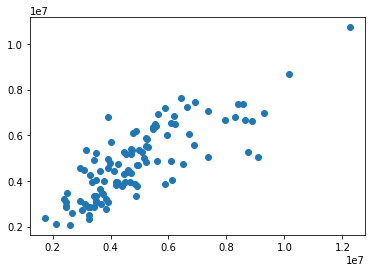

In [21]:
plt.scatter(y_test,predicted_data)

In [22]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
333,3000,3,1,2,1,0,0,0,0,0,0,0
84,3760,3,1,2,1,0,0,1,0,2,0,0
439,3930,2,1,1,0,0,0,0,0,0,0,0
396,3640,2,1,1,1,0,0,0,0,1,0,0
161,6100,3,1,3,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,6600,3,2,1,1,0,1,0,1,0,1,0
344,3850,2,1,1,1,0,0,0,0,0,0,0
176,8520,3,1,1,1,0,0,0,1,2,0,1
244,5320,3,1,2,1,1,1,0,0,0,1,0
